In [1]:
##### APLICACIÓN LECTOR DE NIA - DIEGO ÁLVAREZ Y JOSE LUIS AYUSO #####

In [1]:
%matplotlib inline
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from scipy import ndimage
from skimage.transform import resize
from sklearn.datasets import load_digits

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

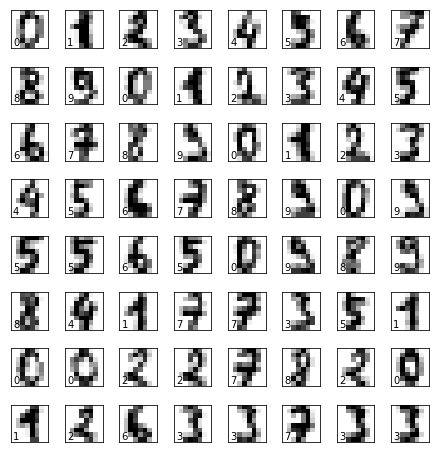

In [2]:
# Carga de database y entrenamiento 

digits = load_digits()

fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
N = len(digits.images)
data = digits.images.reshape((N, -1))

x_train = data
y_train = digits.target

clf = svm.SVC(gamma=0.001, C=100) 
clf.fit(x_train, y_train)

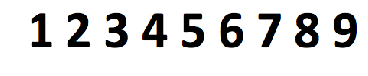

In [21]:
# Lectura de NIA

filename='NIA1.png'
image=plt.imread(filename)
plt.axis('off')
plt.imshow(image)
image_double=image.astype(float)

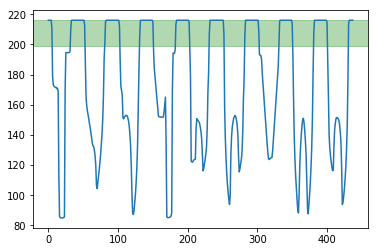

In [22]:
# Gráfica de color

suma1 = np.sum(image_double, axis = 0)
suma = np.sum(suma1,axis = 1)

maximo = suma.max()

altura = 0.92*maximo

plt.plot(suma)
axhspan(altura, maximo, alpha=0.3, color='g')

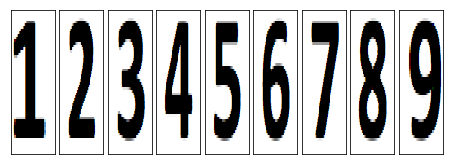

In [23]:
# Segmentación

binario = np.zeros((1,image.shape[1]))
numeros = []
inicio  = []
fin = []
separador = []

subo = False

for i in range(image.shape[1]):
    if (suma[i] > altura):
        binario[0,i] = 1

for j in range(image.shape[1]):
    if (binario[0,j] == 1) & (subo == False):
        subo = True
        inicio.append(j)    
            
    if(binario[0,j] == 0) & (subo == True):
        subo = False
        fin.append(j)
        
    if (j == image.shape[1]-1):
        fin.append(j)

for k in range(len(inicio)):
    punto_medio = int((inicio[k]+fin[k])/2)
    separador.append(punto_medio)

for l in range(len(separador)-1):
    numeros.append(image_double[:,separador[l]:separador[l+1],:])

fig = plt.figure(figsize=(6, 2)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=1.5, wspace=0.1)

for i in range(len(numeros)):
    ax = fig.add_subplot(1, len(numeros), i + 1, xticks=[], yticks=[])
    ax.imshow(numeros[i], cmap=plt.cm.binary, interpolation='nearest',aspect = 'auto')

El NIA del alumno es:
8 2 3 4 5 6 7 8 9


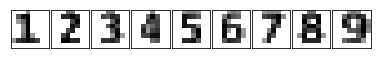

In [24]:
# Comprobación de NIA

resized = []
digits = []
digits_test = []

N = len(numeros)

for i in range (len(numeros)):
    resized.append(resize(numeros[i], (8, 8), mode='constant', anti_aliasing=True))

limitador = 6.0

for k in range (len(numeros)):
    h,w,c = resized[k].shape
    matrix = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):
            numero = resized[k]
            matrix[i,j] = int(16-(((numero[i,j,0]+numero[i,j,1]+numero[i,j,2])/3)*16))
            if(matrix[i,j] < limitador):
                matrix[i,j] = 0
    
    digits.append(matrix)
    
array = np.array(digits)
array = array.reshape(N,64)
    
NIA = clf.predict(array)

fig = plt.figure(figsize=(5, 5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range (NIA.shape[0]):
    ax = fig.add_subplot(1, NIA.shape[0], i + 1, xticks=[], yticks=[])
    ax.imshow(digits[i], cmap=plt.cm.binary, interpolation='nearest')
    
print('El NIA del alumno es:')
print(*NIA)